# OASIS INFOBYTE

### Task 4: Email Spam Dectection using Machine Learning
**Objective:** Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Lets get started!      
**Dataset:** https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Data Preprocessing

In [2]:
df=pd.read_csv("/Users/asaifali/Desktop/Internships/Oasis Infobyte/spam.csv",encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [5]:
df.rename(columns={"v1":"Class","v2":"Document"},inplace=True)

In [6]:
df

,Class,Document
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#Lowercasing

df["Document"]=df["Document"].str.lower() 

### Data Cleaning

In [8]:
#Removing HTML Tags

import re     
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

In [9]:
df['Document']=df['Document'].apply(remove_html_tags)

In [10]:
#Removing URLS

def remove_url(text):      
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [11]:
df["Document"]=df["Document"].apply(remove_url)

In [12]:
#Removing Punctuations
import string
exclude=string.punctuation

In [13]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [14]:
df["Document"]=df["Document"].apply(remove_punc)

### Checking Chat Words 

In [15]:
chat_words={"AFAIK":"As Far As I Know",
"AFK":"Away From Keyboard",
"ASAP":"As Soon As Possible",
"ATK":"At The Keyboard",
"ATM":"At The Moment",
"A3":"Anytime, Anywhere, Anyplace",
"BAK":"Back At Keyboard",
"BBL":"Be Back Later",
"BBS":"Be Back Soon",
"BFN":"Bye For Now",
"B4N":"Bye For Now",
"BRB":"Be Right Back",
"BRT":"Be Right There",
"BTW":"By The Way",
"B4":"Before",
"B4N":"Bye For Now",
"CU":"See You",
"CUL8R":"See You Later",
"CYA":"See You",
"FAQ":"Frequently Asked Questions",
"FC":"Fingers Crossed",
"FWIW":"For What It's Worth",
"FYI":"For Your Information",
"GAL":"Get A Life",
"GG":"Good Game",
"GN":"Good Night",
"GMTA":"Great Minds Think Alike",
"GR8":"Great!",
"G9":"Genius",
"IC":"I See",
"ICQ":"I Seek you (also a chat program)",
"ILU": "I Love You",
"IMHO":"In My Honest/Humble Opinion",
"IMO":"In My Opinion",
"IOW":"In Other Words",
"IRL":"In Real Life",
"KISSK":"Keep It Simple, Stupid",
"LDR":"Long Distance Relationship",
"LMAO":"Laugh My A.. Off",
"LOL":"Laughing Out Loud",
"LTNS":"Long Time No See",
"L8R":"Later",
"MTE":"My Thoughts Exactly",
"M8":"Mate",
"NRN":"No Reply Necessary",
"OIC":"Oh I See",
"PITA":"Pain In The A..",
"PRT":"Party",
"PRW":"Parents Are Watching",
"QPSA":"Que Pasa?",
"ROFL":"Rolling On The Floor Laughing",
"ROFLOL":"Rolling On The Floor Laughing Out Loud",
"ROTFLMAO":"Rolling On The Floor Laughing My A.. Off",
"SK8":"Skate",
"STATS":"Your sex and age",
"ASL":"Age, Sex, Location",
"THX":"Thank You",
"TTFN":"Ta-Ta For Now!",
"TTYL":"Talk To You Later",
"U":"You",
"U2":"You Too",
"U4E":"Yours For Ever",
"WB":"Welcome Back",
"WTF":"What The F...",
"WTG":"Way To Go!",
"WUF":"Where Are You From?",
"W8":"Wait..."}

In [16]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [17]:
df["Document"]=df["Document"].apply(chat_conversion)

In [18]:
# Spelling Correction

from textblob import TextBlob

In [19]:
def spl_crc(text):
    textBlb=TextBlob(text)
    return textBlb.correct().string

In [20]:
df["Document"]=df["Document"].apply(spl_crc)

In [21]:
#Stop Words Removal
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asaifali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords

In [23]:
def remove_stopwords(doc):
    new_text=[]
    for word in doc.split():
        if word in stopwords.words("english"):
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)

In [24]:
df["Document"]=df["Document"].apply(remove_stopwords)

In [25]:
#Emoji Removal

def remove_emoji(text):
    emoji_pattern=re.compile("["
                             u"\U0001F600-\U0001F64F"  #emoticons
                             u"\U0001F300-\U0001F5FF"  #symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  #transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  #flags(ioS)
                             u"\U00002702-\U000027B0" 
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

In [26]:
df["Document"]=df["Document"].apply(remove_emoji)

In [27]:
df

,Class,Document
0,ham,go point crazy available boris n great wor...
1,ham,ok war joking You
2,spam,free entry 2 wily come win cup final must...
3,ham,You dun say early You c already say
4,ham,ah dont think goes us lives around though
...,...,...
5567,spam,time tried 2 contact You You å£750 po...
5568,ham,ì b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy itching acted like id interested bu...


## Model Fitting

In [28]:
#Separating Documents from Target label

X=df["Document"]
y=df["Class"]

In [29]:
#Preprocess the documents using CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [30]:
#Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Train the Naïve Bayes Classifier

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
#Make predictions on the test set

y_pred = classifier.predict(X_test)

# Model Evaluation

In [33]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9739910313901345


In [34]:
#Confusion Matrix

print("CONFUSION MATRIX:- ",'\n',confusion_matrix(y_test,y_pred))

CONFUSION MATRIX:-  
 [[951  14]
 [ 15 135]]


<Figure size 1600x1000 with 0 Axes>

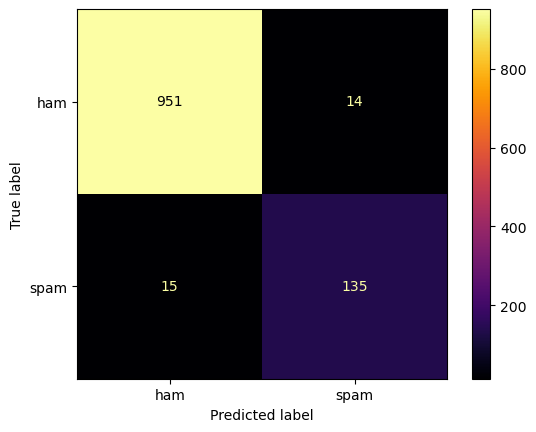

In [35]:
figure(figsize=(16, 10), dpi=100)
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)

disp.plot(cmap="inferno")
plt.show();

In [36]:
#Classification Report

print("CLASSIFICATION REPORT:- ","\n",classification_report(y_test,y_pred))

CLASSIFICATION REPORT:-  
               precision    recall  f1-score   support

         ham       0.98      0.99      0.98       965
        spam       0.91      0.90      0.90       150

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115

